In [97]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [98]:
# Read in data
trial_data = pd.read_csv("Resources/clinicaltrial_data.csv")
mouse_data = pd.read_csv("Resources/mouse_drug_data.csv")

# Combine the data into a single dataset
combined_data = pd.merge(trial_data, mouse_data, on='Mouse ID', how="outer")

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [99]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_data = combined_data.groupby(['Drug', 'Timepoint'])
mean_grouped_data = grouped_data.mean()

# Reset Index
mean_tumor_vol = mean_grouped_data.reset_index()

# Limit data frame to Tumor Volume
mean_tumor_vol = mean_tumor_vol.drop(columns=["Metastatic Sites"])
mean_tumor_vol.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [100]:
import scipy.stats
from scipy.stats import sem

# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standard_error = grouped_data.sem()['Tumor Volume (mm3)']

# Convert Series to DataFrame
sem_tumor_vol = pd.DataFrame(standard_error)

# Reset Index
sem_tumor_vol = sem_tumor_vol.reset_index()
sem_tumor_vol.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [101]:
# Pivot Mean Tumor Volume data frame
mean_tumor_vol = mean_tumor_vol.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
mean_tumor_vol

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [102]:
# Pivot Standard Error Tumor Volume data frame
sem_tumor_vol = sem_tumor_vol.pivot(index="Timepoint", columns="Drug")['Tumor Volume (mm3)']
sem_tumor_vol

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


**Generate Plot**

Limit plot to Capomulin, Infubinol, Ketapril, Placebo

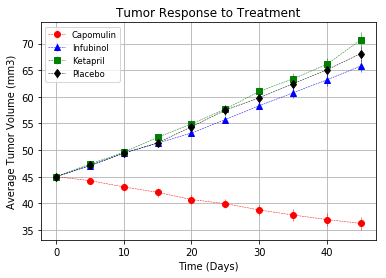

In [103]:
# Set x = timepoints, y = mean tumor volume, y-error = standard error
plt.errorbar(mean_tumor_vol.index, mean_tumor_vol["Capomulin"], yerr=sem_tumor_vol["Capomulin"], fmt='o', color='r', ecolor='r', label="Capomulin", linestyle='--', linewidth=0.5)
plt.errorbar(mean_tumor_vol.index, mean_tumor_vol["Infubinol"], yerr=sem_tumor_vol["Infubinol"], fmt='^', color='b', ecolor='b', label="Infubinol", linestyle='--', linewidth=0.5)
plt.errorbar(mean_tumor_vol.index, mean_tumor_vol["Ketapril"], yerr=sem_tumor_vol["Ketapril"], fmt='s', color='g', ecolor='g', label="Ketapril", linestyle='--', linewidth=0.5)
plt.errorbar(mean_tumor_vol.index, mean_tumor_vol["Placebo"], yerr=sem_tumor_vol["Placebo"], fmt='d', color='k', ecolor='k', label="Placebo", linestyle='--', linewidth=0.5)

# Format
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.legend(loc="best", fontsize="small")
plt.grid()

# Save figure
plt.savefig("Resources/Images/tumor_response.png")

# Show figure
plt.show()

## Metastatic Response to Treatment

In [105]:
# Store the Mean Metastatic Site Data Grouped by Drug and Timepoint 
mean_met_site = grouped_data.mean()["Metastatic Sites"]

# Convert Series to DataFrame
mean_met_df = pd.DataFrame(mean_met_site)

# Reset Index
mean_met_df = mean_met_df.reset_index()
mean_met_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [106]:
# Store the Standard Error associated with Metastatic Sites Grouped by Drug and Timepoint 
sem_met_site = grouped_data.sem()["Metastatic Sites"]

# Convert Series to DataFrame
sem_met_df = pd.DataFrame(sem_met_site)

# Reset Index
sem_met_df = sem_met_df.reset_index()
sem_met_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [107]:
# Pivot DataFrame (mean metastatic sites)
mean_met_df = mean_met_df.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
mean_met_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [108]:
# Pivot DataFrame (standard error of metastatic sites)
sem_met_df = sem_met_df.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
sem_met_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


**Generate Plot**

Limit plot to Capomulin, Infubinol, Ketapril, Placebo

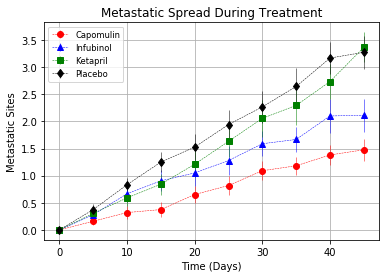

In [109]:
# Set x = timepoints, y = mean met. site, y-error = standard error of met. site
plt.errorbar(mean_met_df.index, mean_met_df["Capomulin"], yerr=sem_met_df["Capomulin"], fmt='o', color='r', ecolor='r', label="Capomulin", linestyle='--', linewidth=0.5)
plt.errorbar(mean_met_df.index, mean_met_df["Infubinol"], yerr=sem_met_df["Infubinol"], fmt='^', color='b', ecolor='b', label="Infubinol", linestyle='--', linewidth=0.5)
plt.errorbar(mean_met_df.index, mean_met_df["Ketapril"], yerr=sem_met_df["Ketapril"], fmt='s', color='g', ecolor='g', label="Ketapril", linestyle='--', linewidth=0.5)
plt.errorbar(mean_met_df.index, mean_met_df["Placebo"], yerr=sem_met_df["Placebo"], fmt='d', color='k', ecolor='k', label="Placebo", linestyle='--', linewidth=0.5)

# Format
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Metastatic Sites")
plt.legend(loc="best", fontsize="small")
plt.grid()

# Save figure
plt.savefig("Resources/Images/metastatic_response.png")

# Show figure
plt.show()

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
grouped_mice = combined_data.groupby(['Drug', 'Timepoint'])
mouse_ct = grouped_mice['Mouse ID'].count()

# Convert to DataFrame
mouse_ct_reset = mouse_ct.reset_index()
mouse_ct_df = pd.DataFrame(mouse_ct_reset)
mouse_ct_df = mouse_ct_df.rename(columns={"Mouse ID":"Mouse Count"})

# Preview DataFrame
mouse_ct_df.head()

In [ ]:
# Minor Data Munging to Re-Format the Data Frames
mouse_ct_df_reformat = mouse_ct_df.pivot(index="Timepoint", columns="Drug")

# Preview the Data Frame
mouse_ct_df_reformat

In [ ]:
# y-values
c_survival_rate = mouse_ct_df_reformat.iloc[:,0]/mouse_ct_df_reformat.iloc[0,0] * 100
i_survival_rate = mouse_ct_df_reformat.iloc[:,2]/mouse_ct_df_reformat.iloc[0,0] * 100
k_survival_rate = mouse_ct_df_reformat.iloc[:,3]/mouse_ct_df_reformat.iloc[0,0] * 100
p_survival_rate = mouse_ct_df_reformat.iloc[:,5]/mouse_ct_df_reformat.iloc[0,0] * 100

# Plot
plt.plot(timepoints, c_survival_rate, '--o', c='r', label='Capomulin', linewidth=0.5)
plt.plot(timepoints, i_survival_rate, '--^', c='b', label='Infubinol', linewidth=0.5)
plt.plot(timepoints, k_survival_rate, '--s', c='g', label='Ketapril', linewidth=0.5)
plt.plot(timepoints, p_survival_rate, '--d', c='k', label='Placebo', linewidth=0.5)

plt.title('Survival During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')
plt.legend()
plt.grid()
plt.show()

## Summary Bar Graph

In [ ]:
# Calculate the percent changes of tumor volume for each drug
first_timepoint = mean_tumor_df_reformat.iloc[0,:]
last_timepoint = mean_tumor_df_reformat.iloc[-1,:]

pct_change = ((last_timepoint - first_timepoint) / first_timepoint) * 100
pct_change

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()